## Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns

# Non parametric tests

This week we are looking at non-parametric equivalents of the t-test.

The t-test is valid only when the data within each group (for independent samples t-test) or the pairwise differences (for paired samples t-test) are Normally distributed

As we have seen in the lecture, many real life data distributions are normal, but many others are not.

For non-Normal data we can use non-parametric tests, which do not assume that the data are drawn from a Normal distribution.

# The Wilcoxon Sign-Rank Test

This is a test for paired samples. It tests whether the median difference between the members of each pair is greater than zero. As such it is often considered to be a non-parametric equivalent for the paired samples t-test.

The Wilcoxon Sign-rank test is <b>not</b> the same as the Wilcoxon Rank Sum test (Mann Whitney U test) which is for independent samples

We will us a Python function called <tt>wilcoxon</tt> from the <tt>scipy.stats</tt> package to run the test

## Example: the Sign-Rank Test

It has been argued that birth order in families affects how independent individuals are as adults - either that first-born children tend to be more independent than later born children or vice versa.

In a (fictional!) study, a researcher identified 20 sibling pairs, each comprising a first- and second- born child from a two-child family. The participants were young adults; each participant was interviewed at the age of 21. 

The researcher scored independence for each participant, using a 25 point scale where a higher score means the person is more independent, based on a structured interview.

Carry out a statistical test for a difference in independence scores between the first- and second-born children.

Note that this is a <b>paired samples</b> design - each member of one group (the first-borns) has a paired member of the other group (second-borns).


### Inspect the data

The data are provided in a text (.csv) file.

Let's load the data as a Pandas dataframe, and plot them to get a sense for their distribution (is it normal?) and any outliers


In [2]:
# load the data and have a look
pandas.read_csv('data/BirthOrderIndependence.csv')

,FirstBorn,SecondBorn
0,12,10
1,18,12
2,13,15
3,17,13
4,8,9
5,15,12
6,16,13
7,5,8
8,8,10
9,12,8


### Scatterplot

In the case of paired data, the most effective way to get a sense of the data is a scatterplot:

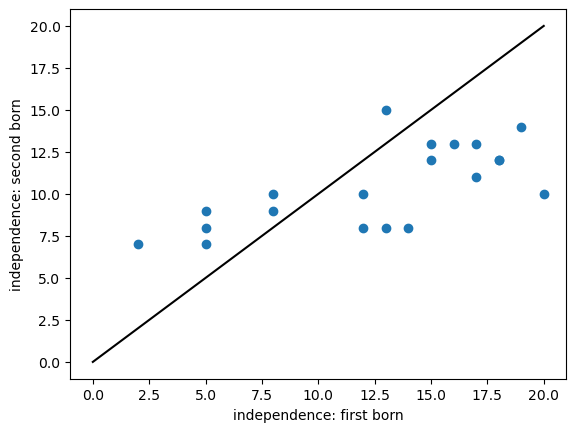

In [3]:
birthOrder = pandas.read_csv('data/BirthOrderIndependence.csv')

plt.scatter(data = birthOrder, x="FirstBorn", y="SecondBorn")
plt.xlabel("independence: first born")
plt.ylabel("independence: second born")

# add the line x=y (ie a line from point(50,50) to (110,110)) for reference 
plt.plot([0,20],[0,20],'k')

Comments:
    
<ul>
<li>There is some correlation in independeence between first- and second-borns (independent first borns have independent second-born siblings)
<li> There are slightly more sibling pairs where the first-born is the more independent (points lying below the line x=y)
<li> It looks like in families with higher independence scores, the first-born is more indepenent than the second-born but for families with lower independednce scores, the opposite is true
</ul>

### Check assumption of normality

In the case of paired data, the assumption we would need to meet to use a t-test is that 
the differences between conditions (for each participant) are normally distributed - let's add a column to our <tt>pandas</tt> data frame to contain the differences

In [4]:
birthOrder['Diff'] = birthOrder.FirstBorn - birthOrder.SecondBorn
birthOrder

,FirstBorn,SecondBorn,Diff
0,12,10,2
1,18,12,6
2,13,15,-2
3,17,13,4
4,8,9,-1
5,15,12,3
6,16,13,3
7,5,8,-3
8,8,10,-2
9,12,8,4


Now let's plot the differences to get a sense of whether they are normally distributed.

/var/folders/q4/twg1yll54y142rc02m5wwbt40000gr/T/ipykernel_31041/4070573100.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(birthOrder["Diff"],  color='b', shade=True)


<Axes: xlabel='Diff', ylabel='Density'>

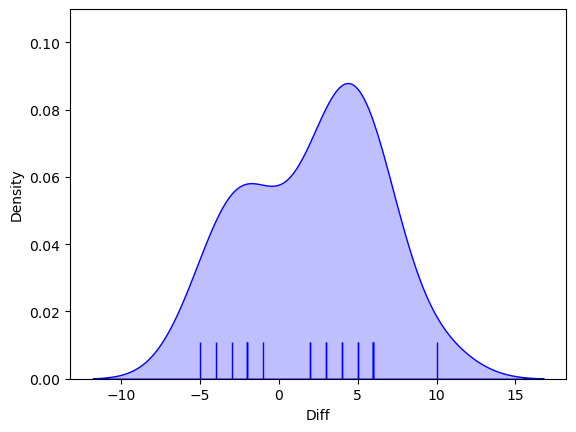

In [5]:
sns.kdeplot(birthOrder["Diff"],  color='b', shade=True)
sns.rugplot(birthOrder["Diff"], height=0.1, color='b')

The distribution does not look very Normal, with a hint of bimodality (two peaks).

Since there is also no theoretical reason to think the differences should be normally distributed, we will use a non-parametric test

### Hypotheses

Ho: the median difference in independence between first- and second-born siblings is is zero

Ha: the median difference in independence is not zero
    
This is a two-tailed test as the researcher's hypothesis (described above) is not directional.

We will test at the $\alpha = 0.05$ significance level

### Descriptive statistics

We obtain the relevant descriptive statistics. For the t-test we reported the summary statistics (mean, s.d. and $n$) that went into the formula for $t$. The same approach won't quite work here as the test is not based on summary statistics. However, common sense suggests that reporting the median for each group, a measure of spread, and the sample size would give the reader an idea of the data.


In [6]:
birthOrder.describe()

,FirstBorn,SecondBorn,Diff
count,20.000000,20.000000,20.000000
mean,12.600000,10.450000,2.150000
std,5.364601,2.438183,4.120232
min,2.000000,7.000000,-5.000000
25%,8.000000,8.000000,-2.000000
50%,13.500000,10.000000,3.000000
75%,17.000000,12.250000,5.250000
max,20.000000,15.000000,10.000000


### Carry out the test

We carry out the test using the function <tt>wilcoxon</tt> from <tt>scipy.stats</tt>, here loaded as <tt>stats</tt>

In [7]:
stats.wilcoxon(birthOrder['FirstBorn'],birthOrder['SecondBorn'],alternative='two-sided')
#help(stats.wilcoxon)

WilcoxonResult(statistic=46.0, pvalue=0.026641845703125)

The inputs to stats.wilcoxon are:
<ul>
    <li>the two samples to be compared (the values of <tt>FirstBorn</tt> and <tt>SecondBorn</tt> from our Pandas data frame <tt>birthOrder</tt>)
<li>the argument <tt>alternative='greater'</tt>, which tells the computer to run a one tailed test 
that mean of the first input (FirstBorn) is greater than the second (SecondBorn).
</ul>
    
The outputs are a value of the test statistic ($T=164$) and <tt>pvalue</tt> ($p=0.0133$) - if this is less than our $\alpha$ value 0.5, there is a significant difference.

More explanation of how T is calculated below.

### Draw conclusions

As the p value of 0.0133 is less than our alpha value of 0.05, the test is significant. 

We can conclude that the median difference in idenpendence is positive, ie the first borns are more independent

# How the Wilcoxon Sign-Rank test works

You have seen how to carry out the Sign-Rank test using scipy.stats but you may be none the wiser about how the computer arrived at the test statistic and p value.

In this section we will build our own version of the test step by step to understand how it worked.

### How to do the test (if you were doing it with pencil and paper)

<ol>
<li>Obtain the difference (in independence score) for each pair

<li>Rank the differences regardless of sign (e.g. a difference of +4 is greater than a difference of -3, which is greater than a difference of +2). Remove pairs with zero difference

<li>Calculate the sum of ranks assigned to pairs with a positive difference (first-born more independent than second-born) - this is $R+$
<li>Calculate the sum of ranks assigned to pairs with a negative difference (first-born more independent than second-born) - this is $R-$

<li>The test statistic $T$ is either:
    <ul>    <li> $R+$ if we expect positive differences to have the larger ranks (in this case, that equates to expecting first-borns to have higher scores)
    <li> $R-$  if we expect negative differences to have the larger ranks (in this case, that equates to expecting second-borns to have higher scores)
    <li> The smaller of $R+$ and $R-$ for a two tailed test (as in the example, we have no a-prior hypothesis about direction of effect)
</ul>
<br>    

<li>$T$ is compared with a null distribution (the expected distribubtion of $T$ obtained in samples drawn from a population in which there is no true difference between groups)
</ol>

### Step 1: Obtain the differences

We already did this and added a column 'Rank' do our dataframe

### Step 2: Rank the differences regardless of sign

We can obtain the absolute differences and save them in a new column of the dataframe as follows


In [8]:
birthOrder['AbsDiff'] = birthOrder['Diff'].abs()
birthOrder

,FirstBorn,SecondBorn,Diff,AbsDiff
0,12,10,2,2
1,18,12,6,6
2,13,15,-2,2
3,17,13,4,4
4,8,9,-1,1
5,15,12,3,3
6,16,13,3,3
7,5,8,-3,3
8,8,10,-2,2
9,12,8,4,4


Then we rank the absolute differences

In [9]:
birthOrder['Rank'] = birthOrder['AbsDiff'].rank()
birthOrder

,FirstBorn,SecondBorn,Diff,AbsDiff,Rank
0,12,10,2,2,4.0
1,18,12,6,6,17.5
2,13,15,-2,2,4.0
3,17,13,4,4,11.0
4,8,9,-1,1,1.0
5,15,12,3,3,8.0
6,16,13,3,3,8.0
7,5,8,-3,3,8.0
8,8,10,-2,2,4.0
9,12,8,4,4,11.0


... phew! Let's just check in on our understanding:
<ul>
<li>In the largest ranked pair (rank 20), the difference is +10 (the first-born's independence score was 10 points higher than the second-born's).

<li>Several pairs with a difference of 4 points between siblings share rank 11. In some of these pairs the first-orn was more independent, in some pairs the second-born was more independent. 
<ul>
    <li>Find them in the table.
</ul>
<li>In 13/20 pairs the first-born was more independent; in 7/20 pairs the second-born was more independent.
</ul>

### Work out the test-statistic $T$

We need to add up all the ranks assigned to pairs with positive differences (first-born is more independent)
 to get $R+$ and all the ranks assigned to pairs with negative differences (second-born is more independent)
 to get $R-$ 


In [10]:
Rplus = sum(birthOrder.loc[(birthOrder['Diff']>0), 'Rank'])
Rminus = sum(birthOrder.loc[(birthOrder['Diff']<0), 'Rank'])

print('R+ = ' + str(Rplus))
print('R- = ' + str(Rminus))

R+ = 164.0
R- = 46.0


T is the smaller of these - you might like to check that the value obtained below matches the 'test statistic' from the function <tt>scipy.stats.wilcoxon</tt> that we used above

In [11]:
T = min(Rplus, Rminus)
print('T = ' + str(T))

T = 46.0


### Establish the null distriubtion

To convert our $T$ to a $p$-value, we need to know how the probability of obtaining that value of $T$ due to chance if the null hypothesis were true.

### What do we mean by "If the null were true"?

If the null were true, the first- and second-obrn siblings should be equally likely to be more independent. If this were true, high- and low-ranked differences would occur randomly in favour of the first-born and second-born sibling. So each rank (in this case, the ranks 1-20, as we have 20 sibling pairs) might equally likely feed into $R+$ or $R-$

### Estalbishing the null by complete enumeration

For a much smaller sample size, we could work out all the possible ways the ranks could be randomly assigned to contribute to $R+$ or $R-$, and work out in what proportion of cases this <i>simulated</i> $U$ was as large as, or larger than, the value of $U$ from our experiment.

This is not practical for larger samples as there are too many possible ways to deal the ranks (too many <i>combbinations</i>). In the example above where $n_1 = 9$ and $n_2 = 11$, the number of possible deals or combinations is 167960 - for larger $n$ the number of combinations becomes astronomical.

### Establishing the null by simulation

We can work out the null approximately by doing a lot of random 'deals' of the ranks to $R+$ or $R-$, calculating $T$ for each case, and work out in what proportion of cases this <i>simulated</i> $T$ was as large as, or larger than, the value of $T$ from our experiment.

"A lot" might be 10,000 or more (this is still much lower than the number of possible deals under complete enumeration)

Let's try it!

In [12]:
# Possible ranks are the numbers 1 to 20 (remember Python uses the counterintuitive syntax [1,21))
ranks = np.arange(1,21)
ranks

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [13]:
# flip 20 virtual coind to assign each of these 20 ranks to R+ or R- 
isPos = (np.random.uniform(0,1,20)>0.5)
isPos

array([ True, False, False,  True, False,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True, False,
        True, False])

In [14]:
Rplus=sum(ranks[isPos])
Rminus=sum(ranks[~isPos])

print('R+ = ' + str(Rplus))
print('R- = ' + str(Rminus))

R+ = 126
R- = 84


In [15]:
T = min(Rplus, Rminus)
T=Rplus
print('T = ' + str(T))

T = 126


In [16]:
n = 20
ranks = np.arange(1,(n+1))
maxT = sum(ranks)

nReps = 10000
simulated_T = np.empty(nReps)

for i in range(nReps):
    isPos = (np.random.uniform(0,1,20)>0.5)
    Rplus=sum(ranks[isPos])
    Rminus=sum(ranks[~isPos])
    T = min(Rplus, Rminus)
    simulated_T[i]=T

freq = np.empty(maxT+1)    
for j in np.arange(maxT):
    freq[j] = np.count_nonzero(simulated_T == j)/nReps

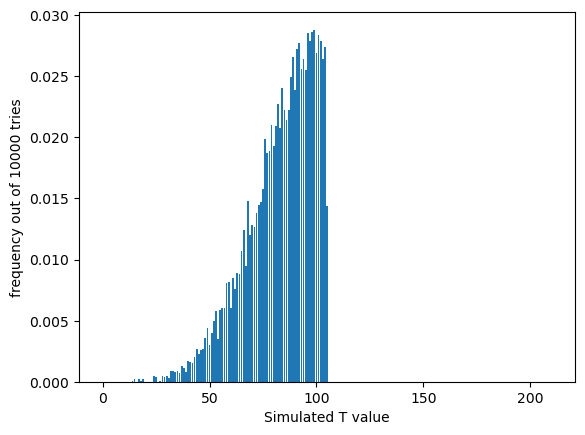

In [17]:
plt.bar(range(maxT+1), height=freq)
plt.xlabel('Simulated T value')
plt.ylabel('frequency out of ' + str(nReps) + ' tries')
plt.show()


In [18]:
p = sum(freq[:46])
p


0.0227